## Helpful links
follow this (signal processing portion): https://app.box.com/file/1283099900531

signal filtering (very helpful): https://swharden.com/blog/2020-09-23-signal-filtering-in-python/

Python toolbox: https://github.com/jabeim/AB-Generic-Python-Toolbox/blob/master/Documentation%20__draft__v0.1.docx

Google research code: https://gitlab.ilabt.imec.be/ahadifar/google-research/-/tree/master/cochlear_implant

python librosa library 

frequencies gotten from: https://ncbi.nlm.nih.gov/pmc/articles/PMC4386730/

paper on mimicking the human ear https://ecs.utdallas.edu/loizou/cimplants/tutorial/introci.pdf

rms energy https://www.analyticsvidhya.com/blog/2022/05/comparison-of-the-rms-energy-and-the-amplitude-envelope/

construct sinusoid https://stackoverflow.com/questions/48043004/how-do-i-generate-a-sine-wave-using-python

adding noise https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8

spectrogram https://www.pnsn.org/spectrograms/what-is-a-spectrogram

plot spectogram https://stackoverflow.com/questions/48598994/scipy-signal-spectrogram-compared-to-matplotlib-pyplot-specgram

frame (2ms) overlap https://stackoverflow.com/questions/66887965/python-audio-segmentation-with-overlapping-and-hamming-windows

In [1]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math

In [26]:
# frequencies gotten from: https://ncbi.nlm.nih.gov/pmc/articles/PMC4386730/
FREQUENCIES_FOR_5_CHANNELS_TABLE_1 = [350, 607, 1053,1827,3170, 8700]
FREQUENCIES_FOR_16_CHANNELS_TABLE_1 = [250, 416, 494, 587, 697, 828, 983, 1168, 1387, 1648, 1958, 2326, 2762, 3281, 3898, 4630, 8700]
FREQUENCIES_FOR_6_CHANNELS_TABLE_2 = [188, 563, 1063, 1813, 2938, 4813, 7938]
FREQUENCIES_FOR_22_CHANNELS_TABLE_2 = [188, 313, 438, 563, 688, 813, 938, 1063, 1188, 1438, 1688, 1938, 2313, 2688, 3188, 3688, 4313, 5603, 5938, 6938, 7938]

In [27]:
wav_file = "LL-Q1860_(eng)-Vealhurl-cosmos2.wav"
frequency_ranges = FREQUENCIES_FOR_6_CHANNELS_TABLE_2 ### CHANGE THIS TO which you want
LEN_TIME_QUANTIZED_MS = 8
OVERLAP_MS = 0

In [28]:
# Load sample data from a WAV file
sample_rate, data = scipy.io.wavfile.read(wav_file)
times = np.arange(len(data))/sample_rate
# data = sum(data.T) # if data is a 2d array (with two channels) 
print(data.shape)

print("sample_rate:", str(sample_rate) + " samples/sec")

(62848,)
sample_rate: 48000 samples/sec


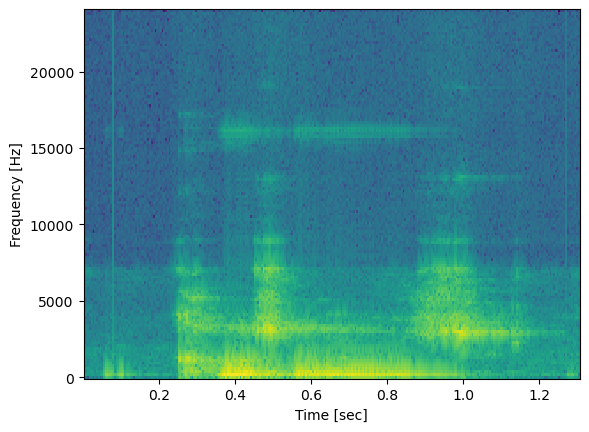

In [29]:
spectrogram_data = scipy.signal.spectrogram(data, sample_rate)

f, t, Sxx = scipy.signal.spectrogram(data, sample_rate)
plt.pcolormesh(t, f, 10*np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [30]:
data.shape

(62848,)

In [31]:
def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

In [32]:
bandpassed_frequencies_low_to_high = []

for indx in range(0, len(frequency_ranges)-1):
    low, high = frequency_ranges[indx], frequency_ranges[indx+1]
    bandpassed_frequencies_low_to_high.append(bandpass(data, [low, high], sample_rate))

In [33]:
bandpassed_frequencies_low_to_high

[array([-2.57185563, -2.68157693, -2.78924352, ..., -0.13748159,
        -0.11930949, -0.10293655]),
 array([ 0.22521796,  0.00652396, -0.20983347, ...,  0.09657877,
         0.09935637,  0.09956848]),
 array([-0.36379953,  0.39850859,  1.1580301 , ..., -0.36517201,
        -0.46783202, -0.5301125 ]),
 array([ 0.38891196, -0.27022344, -0.8611591 , ..., -0.82757462,
        -1.01343376, -1.05717415]),
 array([ 0.19414493, -0.9550364 , -1.79059025, ..., -2.25405309,
        -1.0016136 ,  0.49897806]),
 array([-0.07336397, -0.83516428, -0.91514664, ..., -0.00159459,
         0.16659081, -0.06987253])]

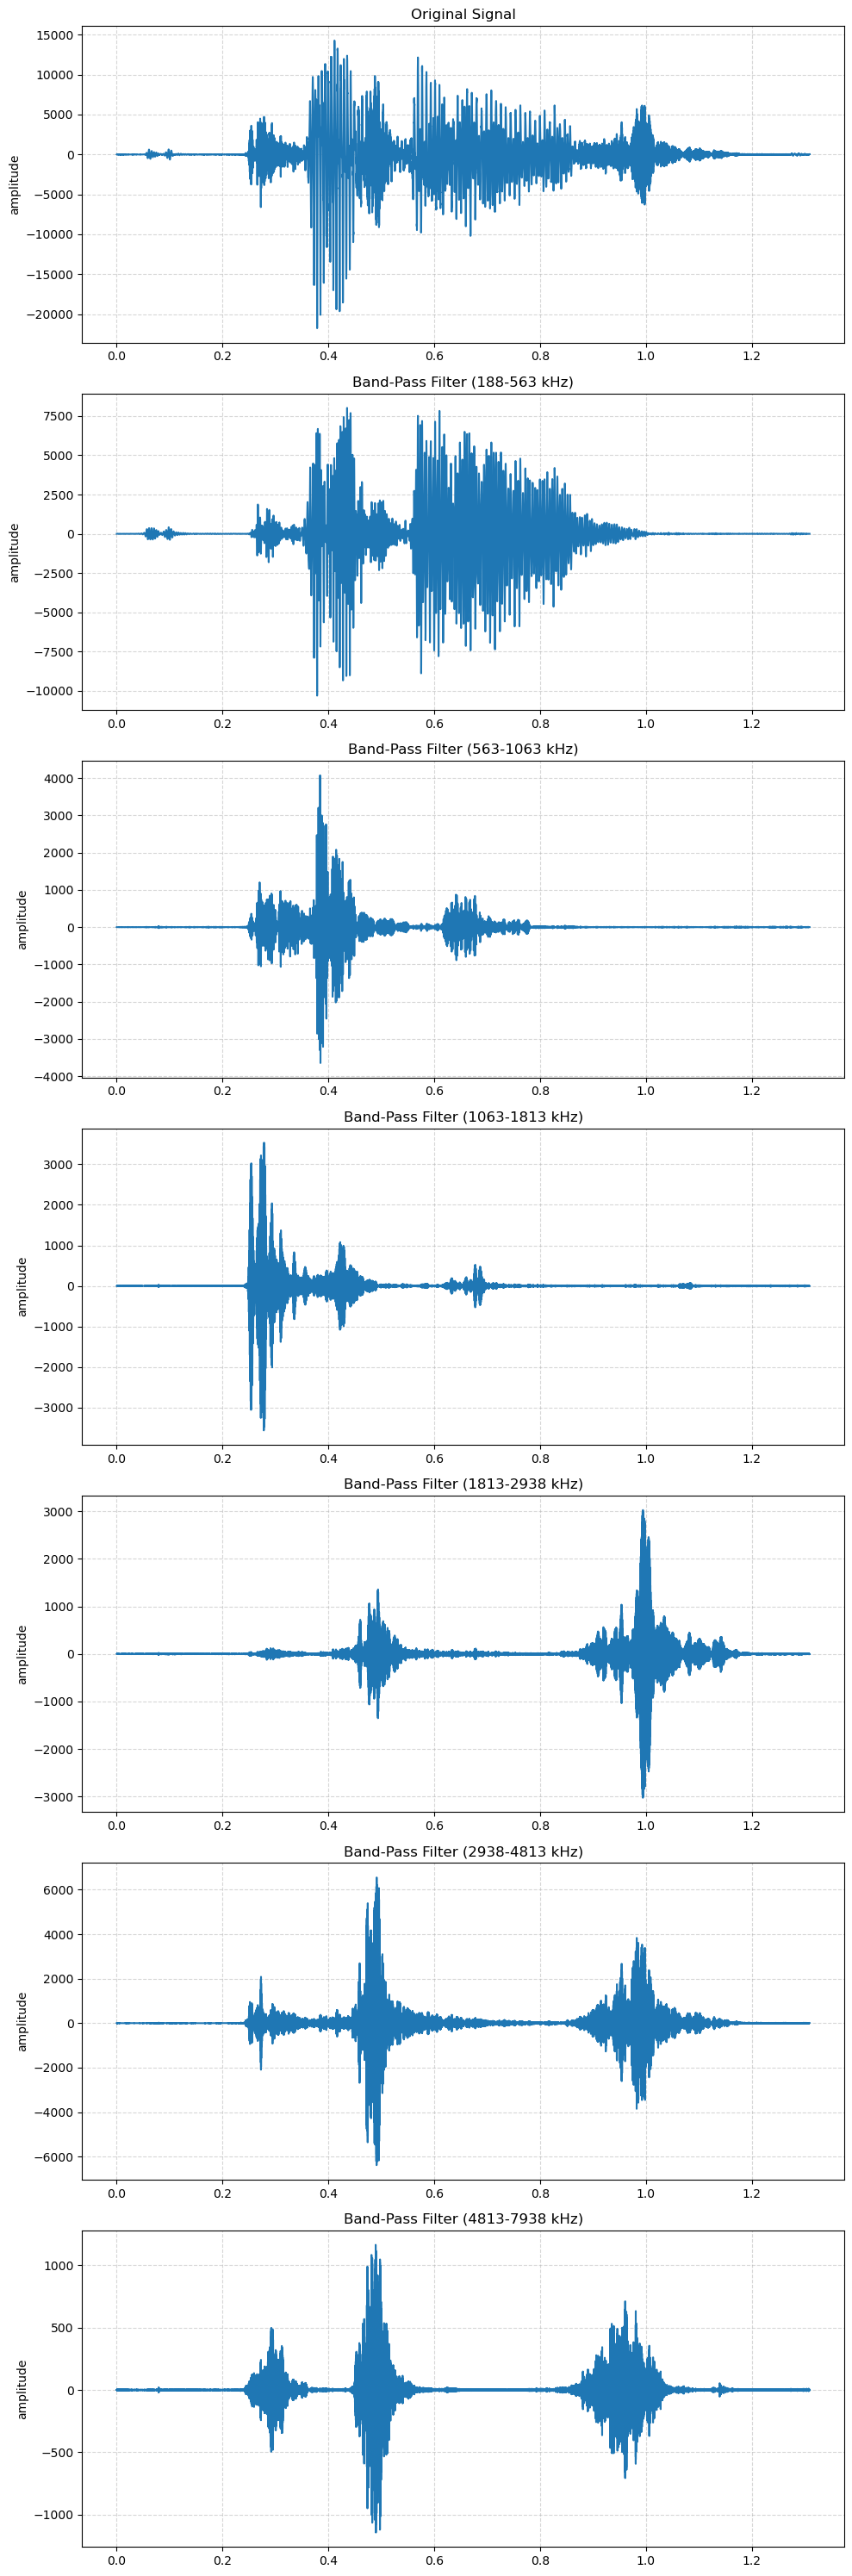

In [34]:
# display result Bandpassed
fig, axes = plt.subplots(len(bandpassed_frequencies_low_to_high)+1, figsize=(10, 30))
axes[0].set_title("Original Signal")
axes[0].grid(alpha=.5, ls='--')
axes[0].plot(times, data) # plot entire graph
axes[0].set_ylabel('amplitude')
# axes[0].set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet

# ax1.margins(.1, .1)
indx = 0
for ax in axes[1:]:
    low,high = frequency_ranges[indx], frequency_ranges[indx+1]
    ax.set_title(f"Band-Pass Filter ({low}-{high} kHz)")
    ax.grid(alpha=.5, ls='--')
    ax.plot(times, bandpassed_frequencies_low_to_high[indx])
    ax.set_ylabel('amplitude')
#     ax.set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
#     ax.margins(.1, .1)
    indx += 1
plt.tight_layout()

plt.show()

In [35]:
enveloped_frequencies_low_to_high = []
for indx in range(len(bandpassed_frequencies_low_to_high)):
    enveloped_frequencies_low_to_high.append(np.abs(bandpassed_frequencies_low_to_high[indx]))

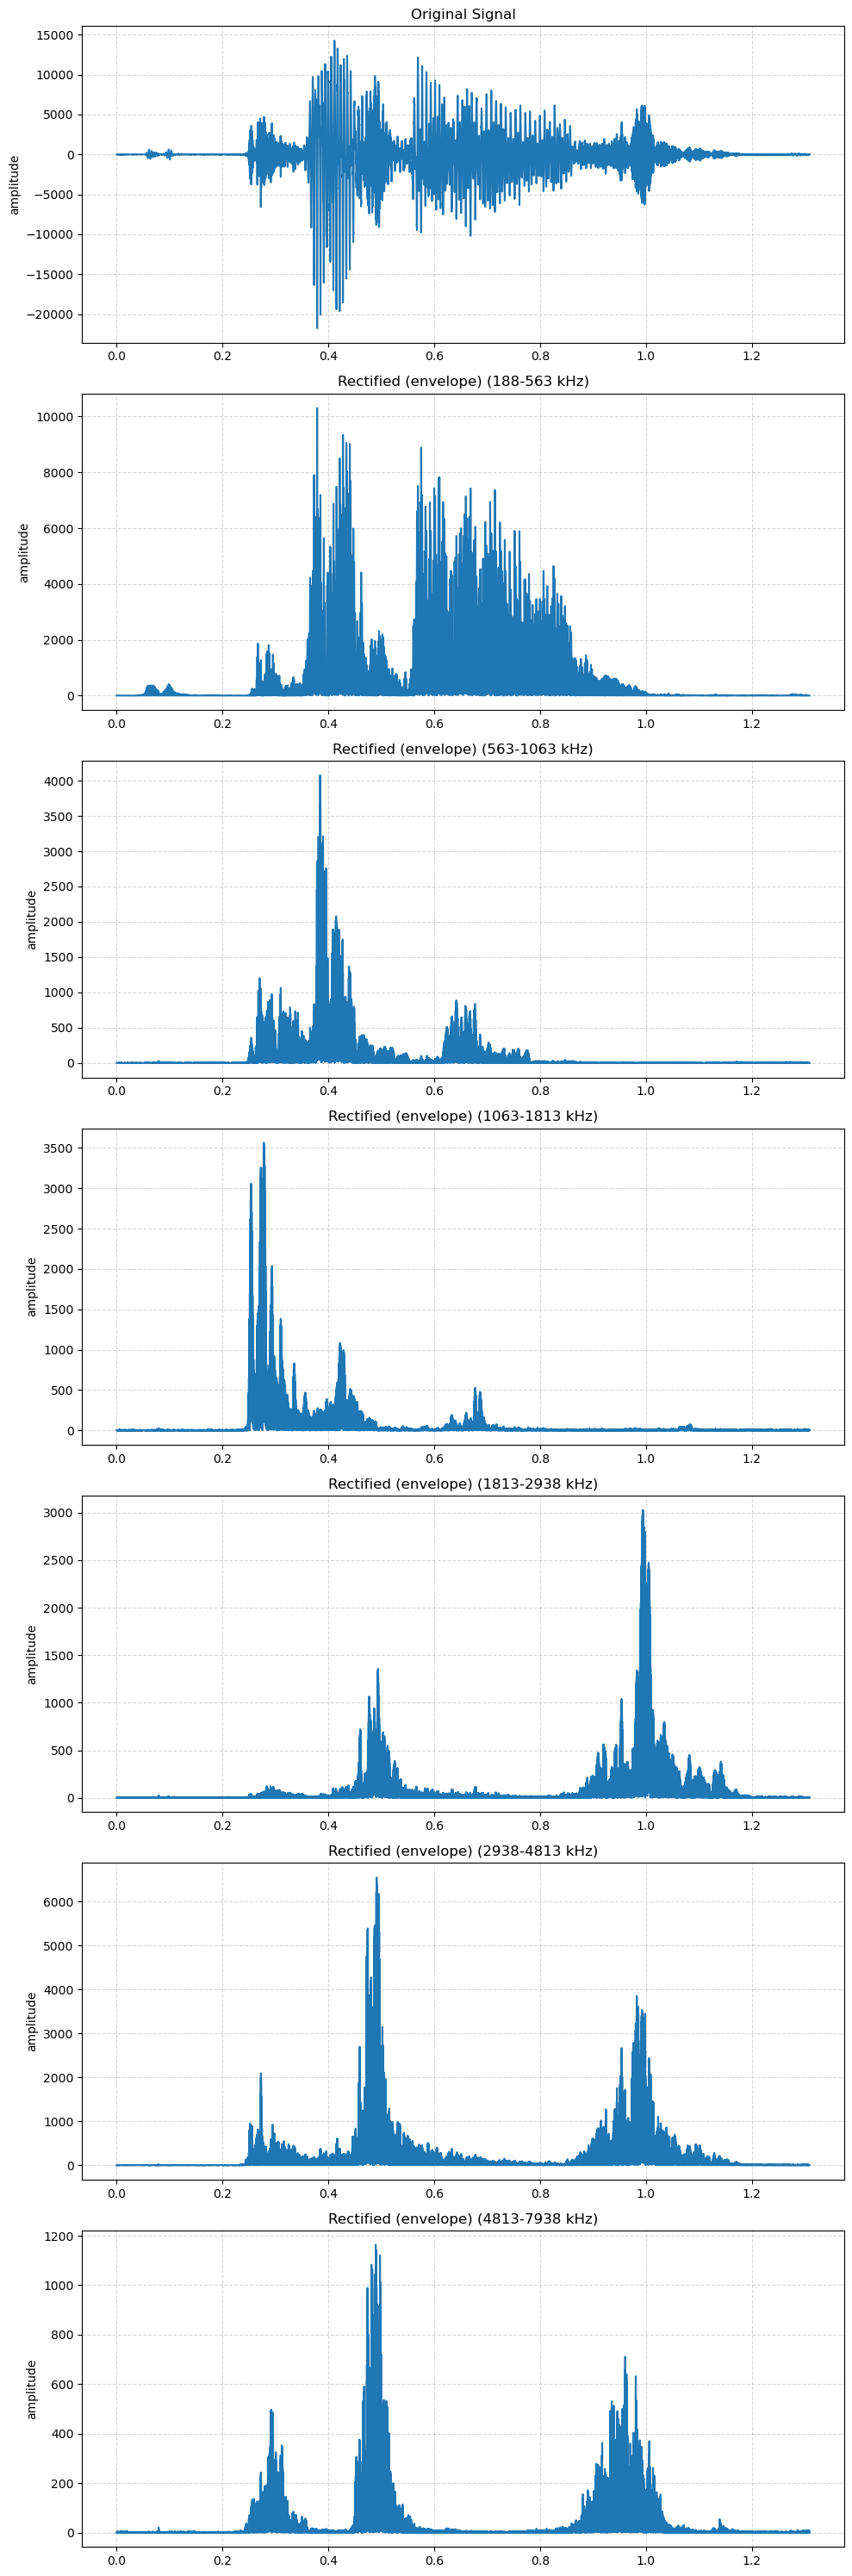

In [36]:
# display result Rectified
fig, axes = plt.subplots(len(enveloped_frequencies_low_to_high)+1, figsize=(10, 30))
axes[0].set_title("Original Signal")
axes[0].grid(alpha=.5, ls='--')
axes[0].plot(times, data)
axes[0].set_ylabel('amplitude')
# axes[0].set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
# ax1.margins(.1, .1)
indx = 0
for ax in axes[1:]:
    low,high = frequency_ranges[indx], frequency_ranges[indx+1]
    ax.set_title(f"Rectified (envelope) ({low}-{high} kHz)")
    ax.grid(alpha=.5, ls='--')
    ax.plot(times, enveloped_frequencies_low_to_high[indx])
    ax.set_ylabel('amplitude')
#     ax.set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
#     ax.margins(.1, .1)
    indx += 1
plt.tight_layout()
plt.show()

### DO NOT JUST GET THE POSITIVE AMPLITUDE. DO "ENVELOPE EXTRACTION"

In [37]:
# got rms energy with overlap, LEN_TIME_QUANTIZED_MS=8ms i.e. if overlap is 2ms, calculate rms energy for 8 ms at 0s, 2s, 4s, 6s, 8s, ...
# get rms every 8 ms, construct a sinusoid with amplitude = rms energy and frequency = average of the bandpass filter
# sample rate = 48000/s or 384 per 8 ms
# TIP: make sure to use a zero phase filter as a parameter in the bandpass filter
if OVERLAP_MS == 0 or OVERLAP_MS > LEN_TIME_QUANTIZED_MS:
    OVERLAP_MS = LEN_TIME_QUANTIZED_MS

rms_energy_values = []

frame_step = int((sample_rate/1000)*LEN_TIME_QUANTIZED_MS) # the number of values equal to LEN_TIME_QUANTIZED_MS milliseconds. this should give an integer
overlap_step = int((sample_rate/1000)*OVERLAP_MS) # the number of values equal to the millisecond overlap

for frequencies in enveloped_frequencies_low_to_high:
    rms_list = []
    indx = 0
    final_indx = indx + frame_step
    while final_indx < frequencies.shape[0]:
        rms_list.append(math.sqrt(np.mean(frequencies[indx:final_indx]**2)))
        indx += overlap_step
        final_indx += overlap_step
    final_frame_length = len(frequencies[indx:])
    rms_list.append(math.sqrt(np.mean(frequencies[indx:]**2)))
    rms_energy_values.append(np.array(rms_list))

In [25]:
len(rms_energy_values[0])

164

In [ ]:
rms_energy_values
enveloped_frequencies_low_to_high

In [51]:
'''
the rms energy values will be the amplitude of the sinusoid over 8ms
the frequency of the 8ms should be the average frequency in that range.
'''

def create_sinusoid(average_frequency, amplitude, t):
    '''
    average_frequency (int): should be the average frequency of that channel
    t (int): should be the time of the generated sound in seconds
    sample_rate (int): should be the sample rate of the audio file
    sample_rate (float): should be the amplitude of the sound, in this case the rms energy value
    ''' 
    f = average_frequency

    samples = np.linspace(0, t, int(sample_rate*t), endpoint=False)
    print('samples:',samples)
    print(len(samples))

    signal = np.sin(2 * np.pi * f * samples)
    print("signal:", signal)
    print(len(signal))

    signal *= amplitude # ?? should multiply by the rms energy

    return signal

In [251]:
signal = []

for indx in range(len(frequency_ranges)-1):
    output = []
    min_frequency = frequency_ranges[indx]
    max_frequency = frequency_ranges[indx+1]
    average_frequency = (min_frequency+max_frequency)/2
    ## TODO HERE: get every 8 seconds and its amplitude
    for amplitude in rms_energy_values[indx][:-1]: # do this until the final frame which may not be the max frame length
        output.extend(create_sinusoid(average_frequency, amplitude, OVERLAP_MS/1000))
    output.extend(create_sinusoid(average_frequency, amplitude, (final_frame_length/frame_step)*LEN_TIME_QUANTIZED_MS/1000)) # process the final frame which may not be the max frame length 
    signal.append(np.array(output))
    

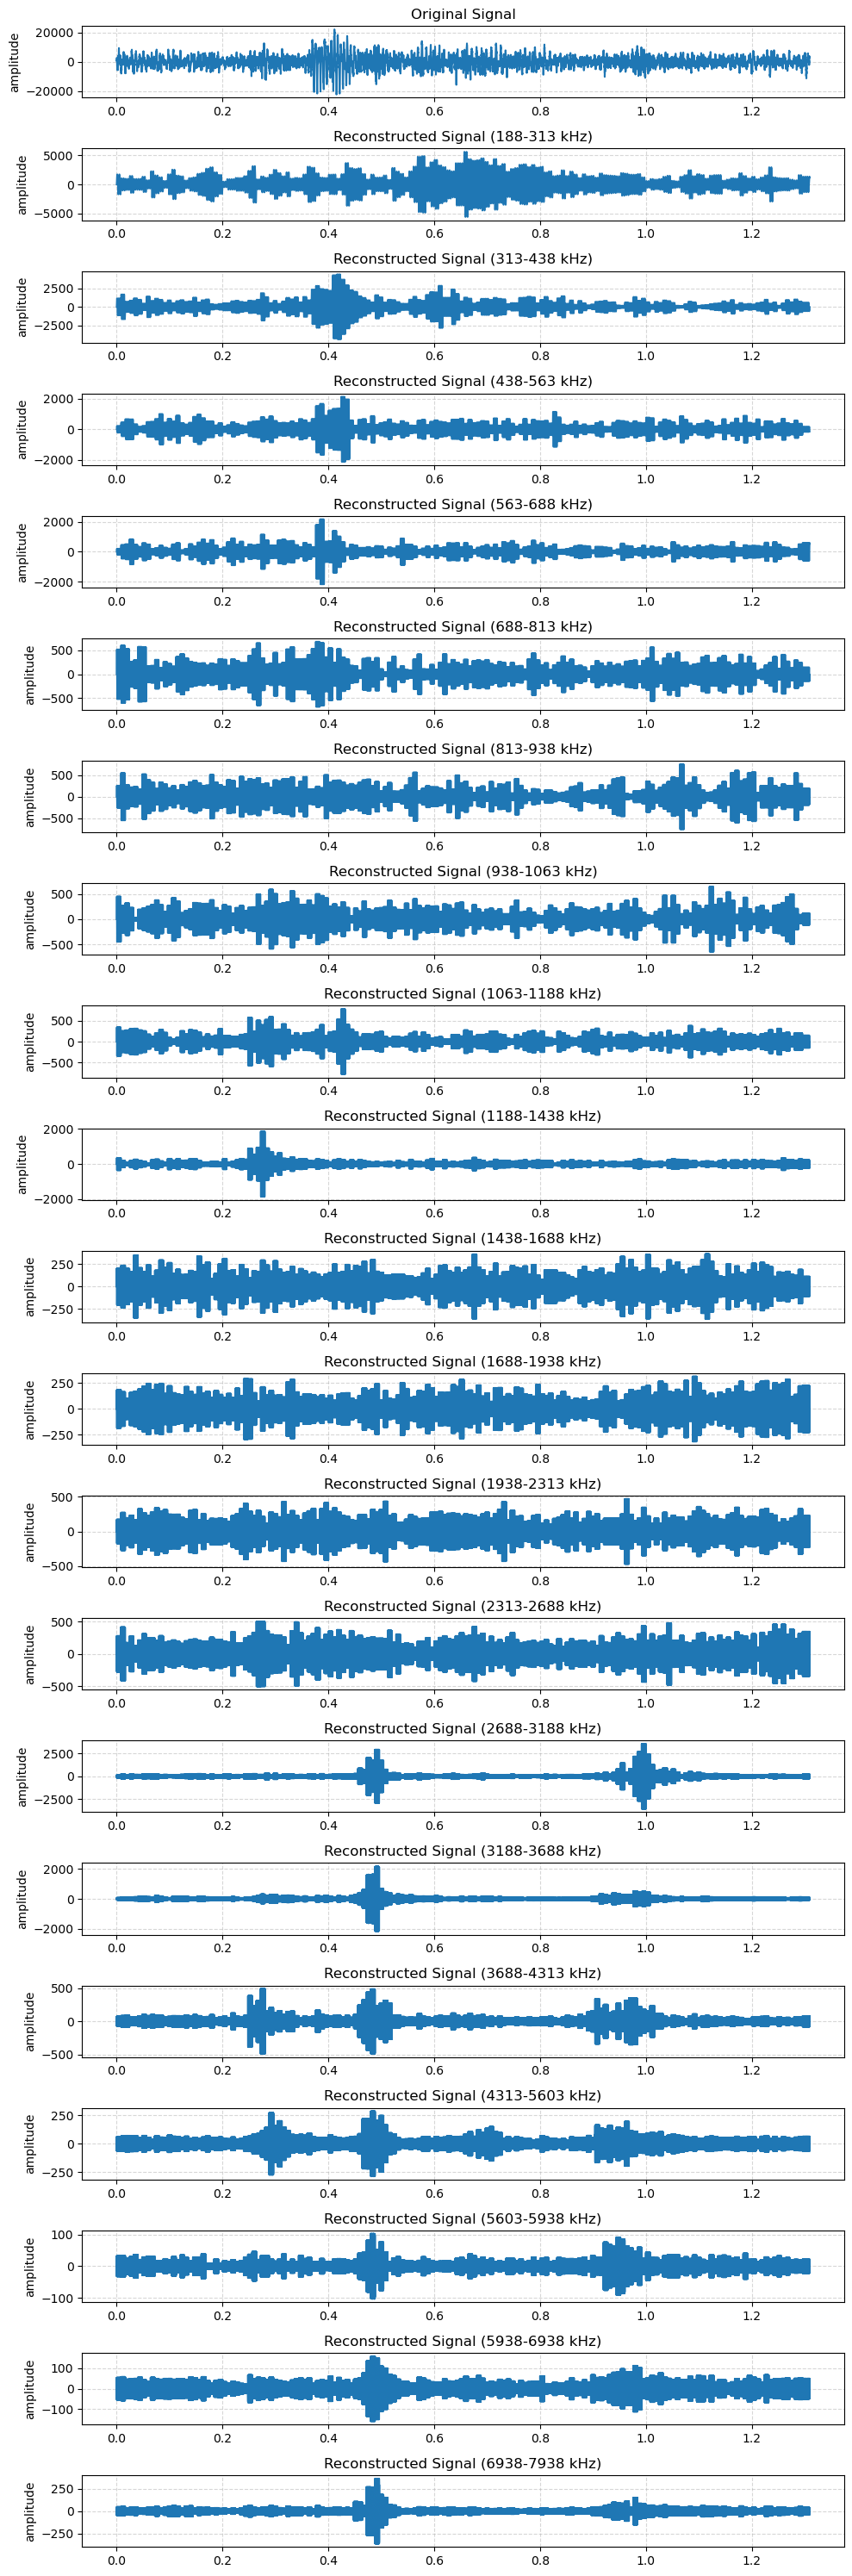

In [252]:
times_reconstructed = np.arange(len(signal[0]))/sample_rate
fig, axes = plt.subplots(len(signal)+1, figsize=(10, 30))
axes[0].set_title("Original Signal")
axes[0].grid(alpha=.5, ls='--')
axes[0].plot(times, data)
axes[0].set_ylabel('amplitude')
# axes[0].set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
# ax1.margins(.1, .1)
indx = 0
for ax in axes[1:]:
    low,high = frequency_ranges[indx], frequency_ranges[indx+1]
    ax.set_title(f"Reconstructed Signal ({low}-{high} kHz)")
    ax.grid(alpha=.5, ls='--')
    ax.plot(times_reconstructed, signal[indx])
    ax.set_ylabel('amplitude')
#     ax.set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
#     ax.margins(.1, .1)
    indx += 1
plt.tight_layout()
plt.show()

### DO NOT JUST GET THE POSITIVE AMPLITUDE. DO "ENVELOPE EXTRACTION"

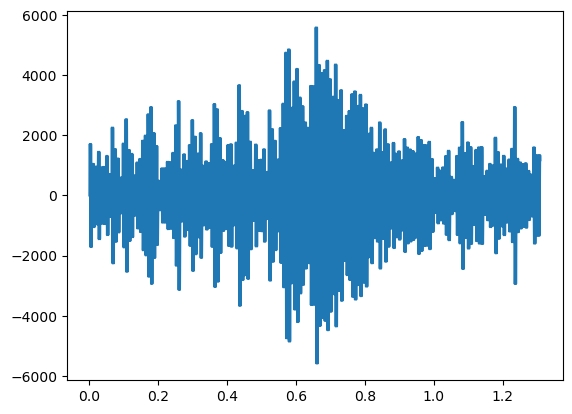

In [253]:
plt.plot(np.arange(len(signal[0]))/sample_rate, signal[0])
# plt.xlim(0.4, 0.42) # show a 20 ms snippet
plt.show()

In [254]:
signal_wav = sum(np.int16(signal))
print(signal_wav)
scipy.io.wavfile.write("reconstructed_sounds/"+input("Name your audio: ")+"-"+input("How many channels?")+"channels_"+input("How many milliseconds of overlap? ")+"millisecondoverlap.wav", sample_rate, signal_wav) # have to transpose signal and combine all channels by adding

[   0  869 1611 ... 2109 2133 2015]
Name your audio: noised_cosmos.85
How many channels?22
How many milliseconds of overlap? 0


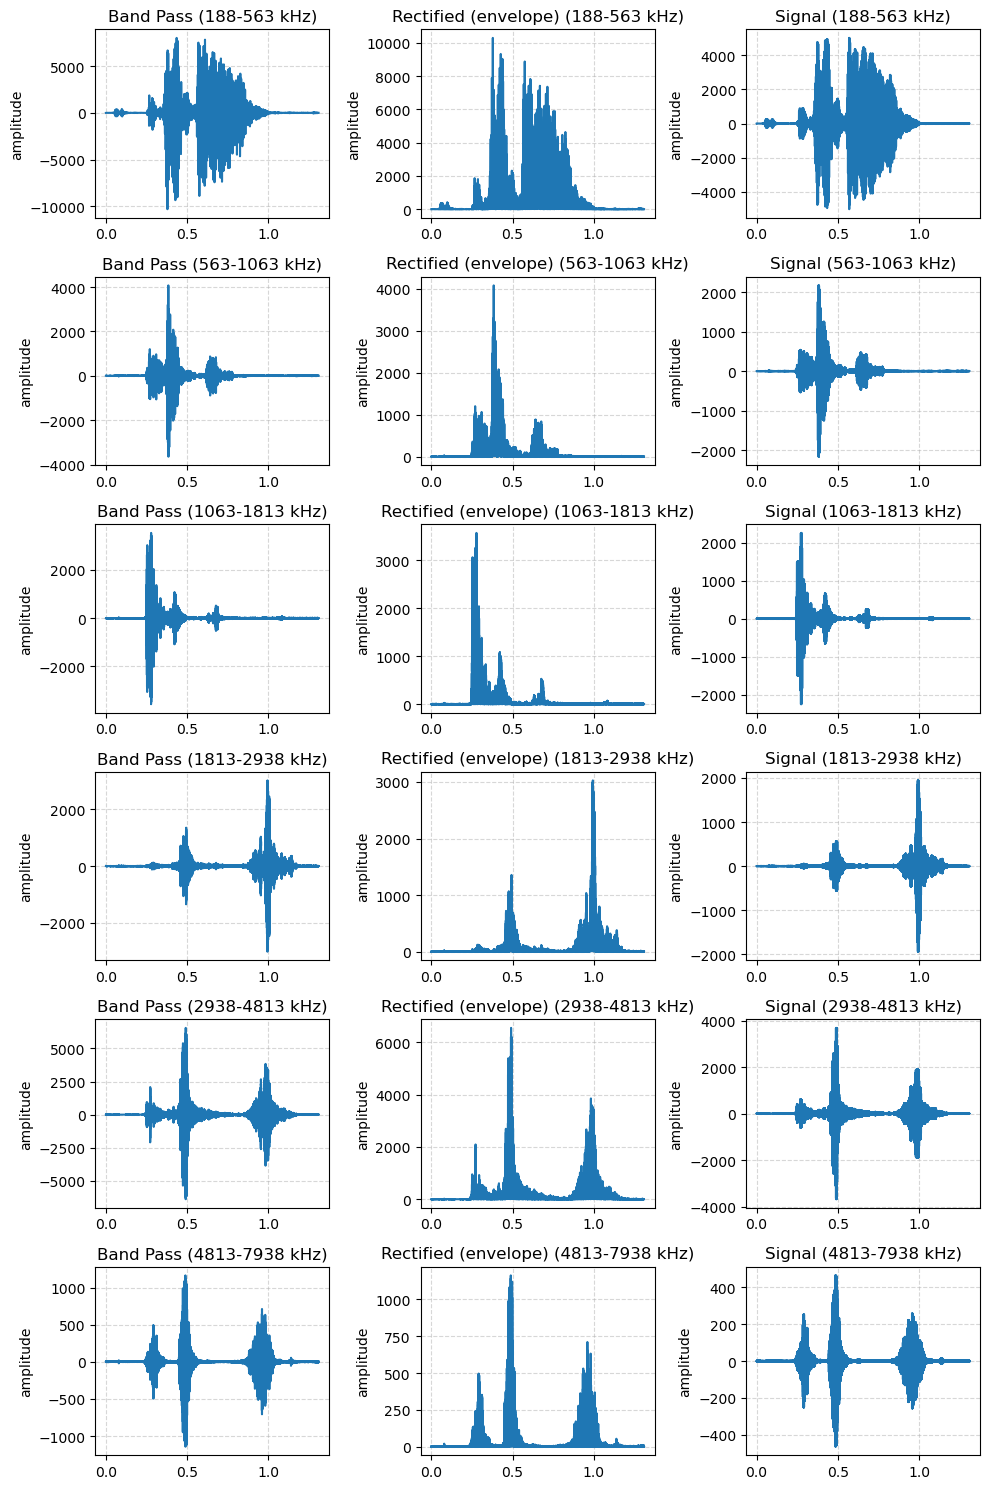

In [70]:
# plot all graphs together
times_reconstructed = np.arange(len(signal))/sample_rate
fig, axes = plt.subplots(len(signal), 3, figsize=(10, 15))

columns = [(bandpassed_frequencies_low_to_high, "Band Pass"), (enveloped_frequencies_low_to_high, "Rectified (envelope)"), (signal, "Signal")]

for indx in range(len(signal)):
    for column_indx in range(3):
        low,high = frequency_ranges[indx], frequency_ranges[indx+1]
        axes[indx, column_indx].set_title(f"{columns[column_indx][1]} ({low}-{high} kHz)")
        axes[indx, column_indx].grid(alpha=.5, ls='--')
#         print(columns[column_indx][0][indx])
#         print(len(columns[column_indx][0][indx]))
#         print(len(times_reconstructed))
#         break
        axes[indx, column_indx].plot(times, columns[column_indx][0][indx])
        axes[indx, column_indx].set_ylabel('amplitude')
#     break
plt.tight_layout()
plt.show()

### DO NOT JUST GET THE POSITIVE AMPLITUDE. DO "ENVELOPE EXTRACTION"

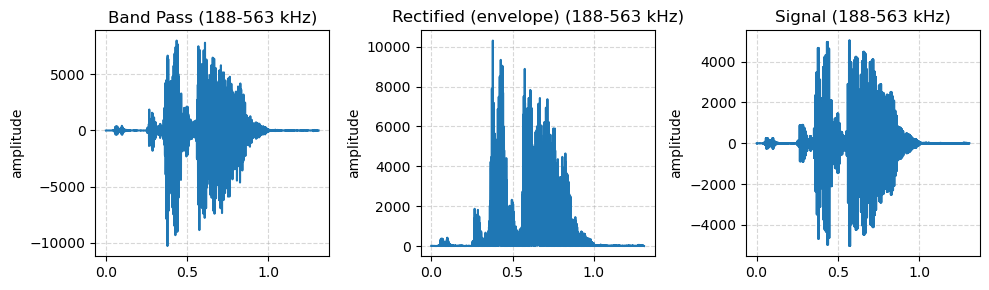

In [100]:
# plot one frequency range
times_reconstructed = np.arange(len(signal))/sample_rate
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

columns = [(bandpassed_frequencies_low_to_high, "Band Pass"), (enveloped_frequencies_low_to_high, "Rectified (envelope)"), (signal, "Signal")]

for indx in range(len(signal)):
    for column_indx in range(3):
        low,high = frequency_ranges[indx], frequency_ranges[indx+1]
        axes[column_indx].set_title(f"{columns[column_indx][1]} ({low}-{high} kHz)")
        axes[column_indx].grid(alpha=.5, ls='--')
#         print(columns[column_indx][0][indx])
#         print(len(columns[column_indx][0][indx]))
#         print(len(times_reconstructed))
#         break
        axes[column_indx].plot(times, columns[column_indx][0][indx])
        axes[column_indx].set_ylabel('amplitude')
    break
plt.tight_layout()
plt.show()

### DO NOT JUST GET THE POSITIVE AMPLITUDE. DO "ENVELOPE EXTRACTION"

In [117]:
# add 2ms overlap
np.average(signal[0])

246.47189270641186

In [99]:
np.average(bandpassed_frequencies_low_to_high[0])

0.0007103233854872067

In [118]:
signal[0]

array([  0.        ,   0.24457278,   0.4885548 , ..., -12.77570182,
       -12.83877705, -12.87084004])

In [119]:
bandpassed_frequencies_low_to_high[0]

array([-2.57185563, -2.68157693, -2.78924352, ..., -0.13748159,
       -0.11930949, -0.10293655])

In [120]:
np.average(signal[0]-bandpassed_frequencies_low_to_high[0])

246.47118238302636

In [121]:
signal[0]-bandpassed_frequencies_low_to_high[0]

array([  2.57185563,   2.92614972,   3.27779832, ..., -12.63822023,
       -12.71946757, -12.76790349])

In [128]:
# noise
# Load sample data from a WAV file
noise_file = "noise/train1-54065-A-45.wav"

noise_sample_rate, noise_data = scipy.io.wavfile.read(noise_file)
noised_times = np.arange(len(noise_data))/noise_sample_rate
# data = sum(data.T) # if data is a 2d array (with two channels) 
print(noise_data.shape)

print("sample_rate:", str(noise_sample_rate) + " samples/sec")

(220500,)
sample_rate: 44100 samples/sec


In [140]:

scipy.io.wavfile.write("noised_sound1.wav", sample_rate, 0.25*noise_data[:len(data)]+data) # have to transpose signal and combine all channels by adding

In [153]:
# learn about this formula
def signaltonoise(sound_data, axis=0, ddof=0):
    sound_data = np.asanyarray(sound_data)
    m = sound_data.mean(axis)
    sd = sound_data.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)


In [154]:
signaltonoise(data)

array(0.00015126)

In [135]:
signaltonoise(0.25*noise_data[:len(data)]+data)

array(0.00078071)

In [138]:
signaltonoise(noise_data[:len(data)]+100*data)

array(0.00490971)

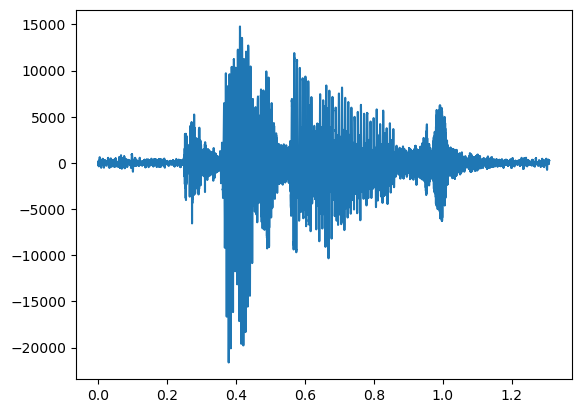

In [144]:
plt.plot(np.arange(len(signal[0]))/sample_rate, 0.05*noise_data[:len(data)]+data)
# plt.xlim(0.4, 0.42) # show a 20 ms snippet
plt.show()

In [145]:
scipy.io.wavfile.write("noised_sound1.wav", sample_rate, 0.05*noise_data[:len(data)]+data) # have to transpose signal and combine all channels by adding

In [147]:
uniform = create_sinusoid(200, 5000, 1000)[:len(data)]
len(uniform)

62848

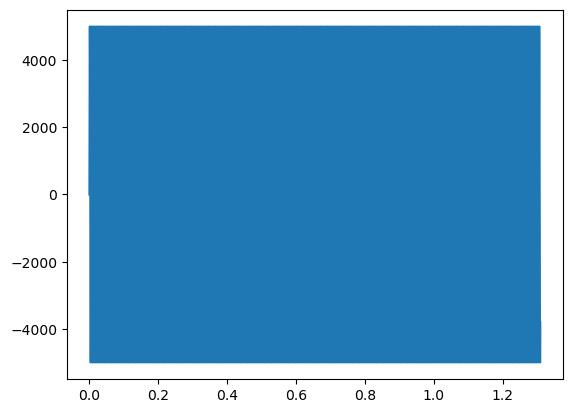

In [148]:
plt.plot(np.arange(len(signal[0]))/sample_rate, uniform)
# plt.xlim(0.4, 0.42) # show a 20 ms snippet
plt.show()

In [149]:
scipy.io.wavfile.write("uniform.wav", sample_rate, uniform) # have to transpose signal and combine all channels by adding

In [159]:
type((data+noise_data[:len(data)])[0])

numpy.int16

In [171]:
scipy.io.wavfile.write("noised_sound2.wav", sample_rate, np.int16(noise_data*0.25)[:len(data)]+data) # have to transpose signal and combine all channels by adding

In [164]:
# signaltonoise(noise_data[:len(data)]+100*data)

import scipy.stats

scipy.stats.signaltonoise(data)

AttributeError: module 'scipy.stats' has no attribute 'signaltonoise'

In [167]:
type(np.int16(noise_data*0.85)[0])

numpy.int16

In [238]:
data = (noise_data*0.75)[:len(data)]+data